# **Analyzing Student Performance**
---
## **Objective**
Identify correlation between each variable and the test scores.

Dataset source: http://roycekimmons.com/tools/generated_data/exams

## **Reading Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
def dataset():
    '''
    Asks the user to import a dataset from a Google Drive folder into a Google Colab 
    project and reads the first 5 indexes.
    '''
    # f = .csv
    f = input("Dataset: ")
    global df
    df = pd.read_csv("/content/drive/My Drive/datasets/" + f)
    return df.head()

dataset()

Dataset: StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
# Rename the columns for convenience.
df.columns
categories = ['gender', 'race', 'parent_educ', 'lunch', 'test_prep']
newcols = categories + ['math', 'reading', 'writing']
df.columns = newcols
df[categories].nunique()

gender         2
race           5
parent_educ    6
lunch          2
test_prep      2
dtype: int64

## **Visualizing**

In [0]:
def cat_box_plot(category):
  plt.figure(figsize=(10,8))
  melted = pd.melt(df, id_vars=[category], value_vars=['math', 'writing', 'reading'], value_name='score', var_name='test')
  sns.boxplot(x='test', y='score', hue=category, data=melted)

### Gender

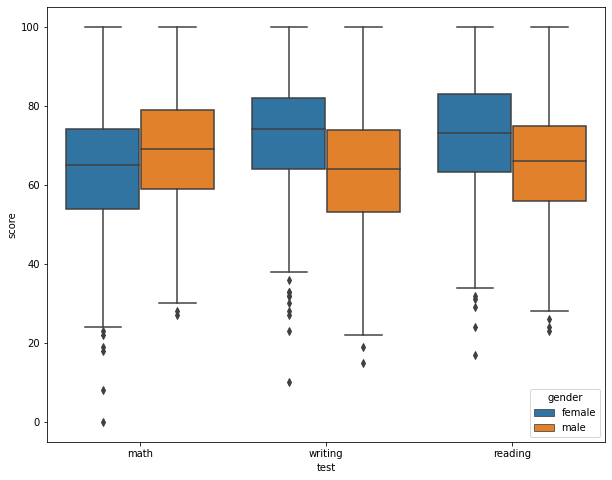

In [26]:
cat_box_plot('gender')

Looking at the plot, we can see that males have better performance in Math, while females scored higher in Writing and Reading. The distributions for each test looks normal, with few outliers at the lower end, so we can try using ANOVA to test for statistical significance of the differences in the scores.

### Race

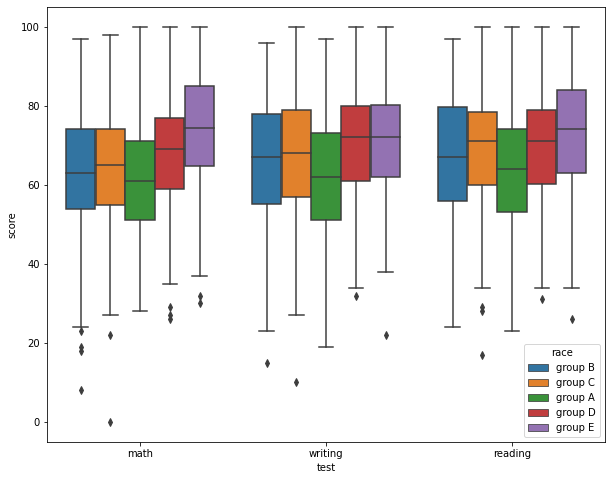

In [27]:
cat_box_plot('race')

By race, there's also some visually evident differences. Race E seems to perform better on all tests than all other groups, save for writing where Race D performed just about the same as Race E. The ranking of the performances of each race group seems to also be consistent among the three tests.

### Parent Level of Education

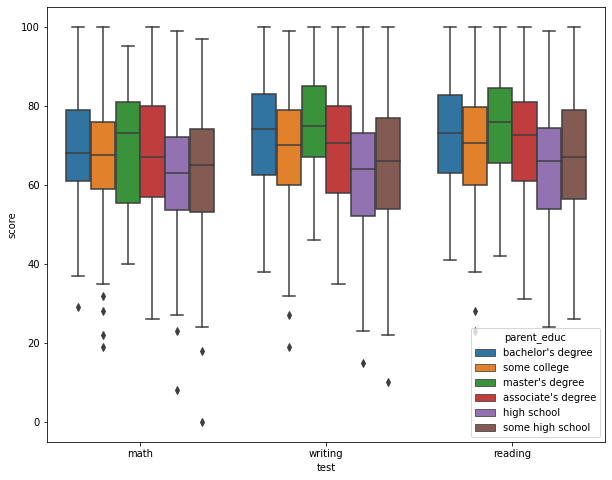

In [28]:
cat_box_plot('parent_educ')

Same as with race, we can see that across the different groups for Parental Level of Education, the ranking of the test performances are consistent. Relatively speaking, students whose parents have master's degrees have the best peformances on average.

### Lunch

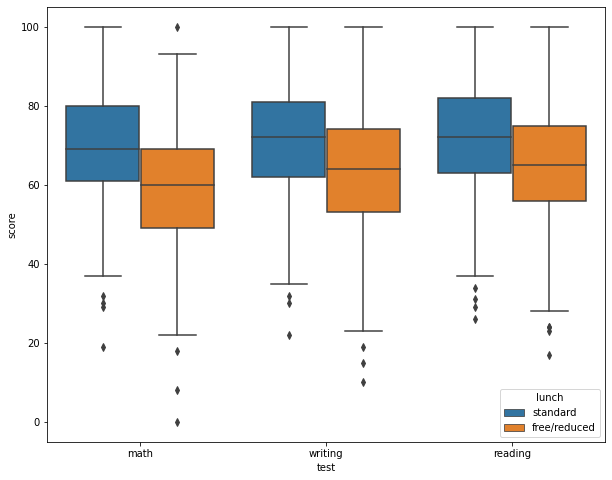

In [29]:
cat_box_plot('lunch')

Students who have standard lunch seemed to perform better on average than those who have free/reduced lunch on all our three tests.

### Test Preparation

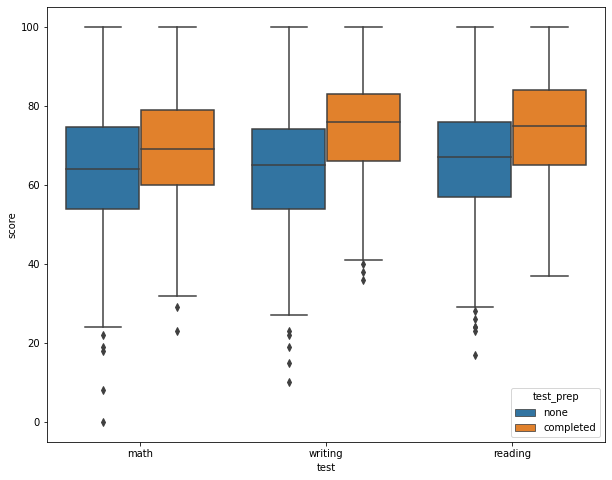

In [30]:
cat_box_plot('test_prep')

Consistently, those who have completed a test prep course performed better on average than those who did not do so.

## **ANOVA**

Now we will see if the differences between the groups in each categories are statistically significant. I will do this using 1-way ANOVA test with 95% confidence interval.

In [0]:
tests = ['math', 'reading', 'writing']

def anova_oneway(category):
  print("Category: {}".format(category))
  for test in tests:
    lm = ols('{} ~ {}'.format(test, category), data=df).fit()
    stat = sm.stats.anova_lm(lm)
    print("P-value for {} scores: {} ".format(test, stat.loc[category, 'PR(>F)']))

In [32]:
for cat in categories:
  anova_oneway(cat)
  print("=" * 20)

Category: gender
P-value for math scores: 9.120185549333453e-08 
P-value for reading scores: 4.680538743934009e-15 
P-value for writing scores: 2.0198777068682407e-22 
Category: race
P-value for math scores: 1.3732194030370688e-11 
P-value for reading scores: 0.0001780089103235852 
P-value for writing scores: 1.0979189070066777e-05 
Category: parent_educ
P-value for math scores: 5.592272384108375e-06 
P-value for reading scores: 1.1682457045709003e-08 
P-value for writing scores: 1.1202799969774331e-13 
Category: lunch
P-value for math scores: 2.413195599315183e-30 
P-value for reading scores: 2.0027966545288553e-13 
P-value for writing scores: 3.1861895831680456e-15 
Category: test_prep
P-value for math scores: 1.5359134607155386e-08 
P-value for reading scores: 9.081783336895556e-15 
P-value for writing scores: 3.6852917352476696e-24 


## **Summary**

For all categories of `gender`, `race`, `parent_educ`, `lunch`, `test_prep`, the differences between the means of the respective groups all have p-values < 0.05, which means they are statistically significant. The performance differences of students across these categories differs between the groups, but we can't tell which groups contribute to the differences yet. If we want to know that, we will have to perform additional tests.